In [1]:
! aws s3 ls s3://olgabot-maca/sourmash/2018-08-10_test_kmer_sizes_gencode/

                           PRE .sbt.gencode.vM17.transcripts.scale1000.k21.dna.sbt/
                           PRE .sbt.gencode.vM17.transcripts.scale1000.k21.protein.sbt/
2018-08-10 13:19:04        554 1
2018-08-10 13:19:04     554829 A1-D041914-3_8_M-1-1.gencode.vM17.csv
2018-08-10 13:19:04    2976628 A1-D041914-3_8_M-1-1.sig
2018-08-10 13:19:04   58628610 A1-D041914-3_8_M-1-1.trimmed.gz
2018-08-10 13:19:04    1327177 A1-D041914-3_8_M-1-1.trimmed.k12.dist
2018-08-10 13:19:04    1304674 A1-D041914-3_8_M-1-1.trimmed.k12.hist
2018-08-10 13:19:04    1231529 A1-D041914-3_8_M-1-1.trimmed.k15.dist
2018-08-10 13:19:04    1208179 A1-D041914-3_8_M-1-1.trimmed.k15.hist
2018-08-10 13:19:04    1176968 A1-D041914-3_8_M-1-1.trimmed.k18.dist
2018-08-10 13:19:04    1182697 A1-D041914-3_8_M-1-1.trimmed.k18.hist
2018-08-10 13:19:04    1156838 A1-D041914-3_8_M-1-1.trimmed.k21.dist
2018-08-10 13:19:04    1162206 A1-D041914-3_8_M-1-1.trimmed.k21.hist
2018-08-10 13:19:04    1124187 A1-D041914-3_8_M-1-1.tri

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import pandas as pd
import numpy as np

import altair as alt
alt.renderers.enable('default')

%matplotlib inline

In [3]:
alt.__version__


'3.1.0'

In [21]:
prefix = "s3://olgabot-maca/sourmash/2018-08-10_test_kmer_sizes_gencode"

TRIMMED_TEMPLATE = f"{prefix}/A1-D041914-3_8_M-1-1.trimmed" + ".k{ksize}.dist"


def logify(dist):
    dist['abundance_log10'] = np.log10(dist['abundance'])
    dist['count_log10'] = np.log10(dist['count'])
    return dist


def get_trimmed_dist(ksize, template=TRIMMED_TEMPLATE):
    dist = pd.read_csv(template.format(ksize=ksize))
    dist['ksize'] = ksize
    dist['is_trimmed'] = 'trimmed'
    dist = logify(dist)
    return dist

k21_trimmed = get_trimmed_dist(21)
k27_trimmed = get_trimmed_dist(27)

trimmed_dist = pd.concat([k21_trimmed, k27_trimmed])
print(trimmed_dist.shape)
trimmed_dist.head()


/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10


(105496, 8)


,abundance,count,cumulative,cumulative_fraction,ksize,is_trimmed,abundance_log10,count_log10
0,0,0,0,0.000,21,trimmed,-inf,-inf
1,1,4304509,4304509,0.529,21,trimmed,0.000000,6.633924
2,2,589818,4894327,0.602,21,trimmed,0.301030,5.770718
3,3,331741,5226068,0.642,21,trimmed,0.477121,5.520799
4,4,259711,5485779,0.674,21,trimmed,0.602060,5.414490


In [24]:
TEMPLATE = f"{prefix}/A1-D041914-3_8_M-1-1_S269_"+"R{read_number}_001.k{ksize}.dist"

def get_untrimmed_dist(ksize, template=TEMPLATE):
    r1 = pd.read_csv(template.format(read_number=1, ksize=ksize), index_col=0)
    r2 = pd.read_csv(template.format(read_number=2, ksize=ksize), index_col=0)
    dist = r1.add(r2[['count', 'cumulative']])
    dist = dist.reset_index()
    dist['cumulative_fraction'] = dist['cumulative'] / dist['count'].sum()
    dist['ksize'] = ksize
    dist['is_trimmed'] = 'untrimmed'
    dist = logify(dist)
    return dist


    

k21_untrimmed = get_untrimmed_dist(21)
print(k21_untrimmed.shape)
k21_untrimmed.head()

(56136, 8)


/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10


,abundance,count,cumulative,cumulative_fraction,ksize,is_trimmed,abundance_log10,count_log10
0,0,0,0,0.000000,21,untrimmed,-inf,-inf
1,1,5540635,5540635,0.420623,21,untrimmed,0.000000,6.743560
2,2,1100893,6641528,0.504198,21,untrimmed,0.301030,6.041745
3,3,637519,7279047,0.552596,21,untrimmed,0.477121,5.804493
4,4,520883,7799930,0.592139,21,untrimmed,0.602060,5.716740


In [25]:
k27_untrimmed = get_untrimmed_dist(27)
print(k27_untrimmed.shape)
k27_untrimmed.head()

(50662, 8)


/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10


,abundance,count,cumulative,cumulative_fraction,ksize,is_trimmed,abundance_log10,count_log10
0,0,0,0,0.000000,27,untrimmed,-inf,-inf
1,1,6438476,6438476,0.461155,27,untrimmed,0.000000,6.808783
2,2,1120943,7559419,0.541443,27,untrimmed,0.301030,6.049584
3,3,653371,8212790,0.588241,27,untrimmed,0.477121,5.815160
4,4,534106,8746896,0.626496,27,untrimmed,0.602060,5.727627


In [27]:
untrimmed = pd.concat([k27_untrimmed, k21_untrimmed])
untrimmed['is_trimmed'] = 'untrimmed'
untrimmed.head()

,abundance,count,cumulative,cumulative_fraction,ksize,is_trimmed,abundance_log10,count_log10
0,0,0,0,0.000000,27,untrimmed,-inf,-inf
1,1,6438476,6438476,0.461155,27,untrimmed,0.000000,6.808783
2,2,1120943,7559419,0.541443,27,untrimmed,0.301030,6.049584
3,3,653371,8212790,0.588241,27,untrimmed,0.477121,5.815160
4,4,534106,8746896,0.626496,27,untrimmed,0.602060,5.727627


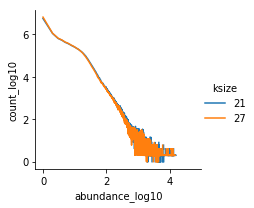

In [17]:
g = sns.FacetGrid(untrimmed, hue='ksize')
g.map(sns.lineplot, 'abundance_log10', 'count_log10', scaley='log')
g.add_legend()

In [30]:
combined_dists = pd.concat([trimmed_dist, untrimmed], ignore_index=True)
print(combined_dists.shape)
combined_dists.head()

(212294, 8)


,abundance,count,cumulative,cumulative_fraction,ksize,is_trimmed,abundance_log10,count_log10
0,0,0,0,0.000,21,trimmed,-inf,-inf
1,1,4304509,4304509,0.529,21,trimmed,0.000000,6.633924
2,2,589818,4894327,0.602,21,trimmed,0.301030,5.770718
3,3,331741,5226068,0.642,21,trimmed,0.477121,5.520799
4,4,259711,5485779,0.674,21,trimmed,0.602060,5.414490


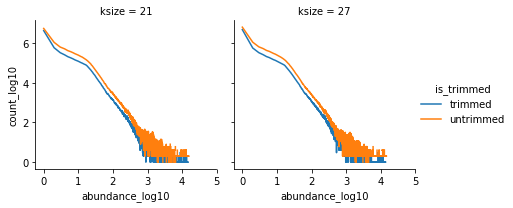

In [31]:
g = sns.FacetGrid(combined_dists, hue='is_trimmed', col='ksize')
g.map(sns.lineplot, 'abundance_log10', 'count_log10')
g.add_legend()

In [ ]:
untrimmed

In [8]:
# # The basic line
# line = alt.Chart(untrimmed).mark_line().encode(
#     x='abundance:Q',
#     y='count:Q',
#     color='ksize:N'
# )
# line

In [9]:
r2_k21 = pd.read_csv("s3://olgabot-maca/sourmash/2018-08-10_test_kmer_sizes_gencode/A1-D041914-3_8_M-1-1_S269_R2_001.k21.dist", index_col=0)
r2_k21.head()

,count,cumulative,cumulative_fraction
abundance,,,
0,0,0,0.000
1,3276199,3276199,0.461
2,563179,3839378,0.540
3,319489,4158867,0.585
4,261534,4420401,0.622


In [19]:
k21 = r1_k21.add(r2_k21[['count', 'cumulative']])
k21['cumulative_fraction'] = k21['cumulative'] / k21['count'].sum()
k21.head()

,count,cumulative,cumulative_fraction
abundance,,,
0,0,0,0.000000
1,5540635,5540635,0.420623
2,1100893,6641528,0.504198
3,637519,7279047,0.552596
4,520883,7799930,0.592139


In [6]:
annotations = pd.read_csv('https://github.com/czbiohub/tabula-muris/raw/master/00_data_ingest/18_global_annotation_csv/annotations_facs.csv', 
                          index_col='cell')
annotations.index = annotations.index.str.replace('.', '-')
annotations['sample_id'] = annotations.index
annotations = annotations.fillna("NA")
print(annotations.shape)
annotations.head()

(44949, 24)


/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Neurog3>0_raw,Neurog3>0_scaled,cell_ontology_class,cell_ontology_id,cluster.ids,free_annotation,mouse.id,mouse.sex,plate.barcode,subsetA,...,subsetC_cluster.ids,subsetD,subsetD_cluster.ids,subsetE,subsetE_cluster.ids,subtissue,tissue,tissue_tSNE_1,tissue_tSNE_2,sample_id
cell,,,,,,,,,,,,,,,,,,,,,
A1-B000610-3_56_F-1-1,NA,NA,bladder cell,CL:1001319,5,Bladder mesenchymal cell,3_56_F,F,B000610,NA,...,NA,NA,NA,NA,NA,NA,Bladder,-7.182841,-10.895094,A1-B000610-3_56_F-1-1
A1-B002764-3_38_F-1-1,NA,NA,bladder urothelial cell,CL:1001428,3,Luminal bladder epithelial cell,3_38_F,F,B002764,NA,...,NA,NA,NA,NA,NA,NA,Bladder,4.199059,-11.050240,A1-B002764-3_38_F-1-1
A1-B002771-3_39_F-1-1,NA,NA,bladder cell,CL:1001319,5,Bladder mesenchymal cell,3_39_F,F,B002771,NA,...,NA,NA,NA,NA,NA,NA,Bladder,-11.995435,-7.325534,A1-B002771-3_39_F-1-1
A1-D041914-3_8_M-1-1,NA,NA,bladder cell,CL:1001319,5,Bladder mesenchymal cell,3_8_M,M,D041914,NA,...,NA,NA,NA,NA,NA,NA,Bladder,-6.820022,-14.174246,A1-D041914-3_8_M-1-1
A1-D042253-3_9_M-1-1,NA,NA,bladder cell,CL:1001319,2,Bladder mesenchymal cell,3_9_M,M,D042253,NA,...,NA,NA,NA,NA,NA,NA,Bladder,-24.163538,-7.499349,A1-D042253-3_9_M-1-1


In [11]:
cell_id = 'A1-D041914-3_8_M-1-1'

In [12]:
annotations.loc[cell_id]

Neurog3>0_raw                                NA
Neurog3>0_scaled                             NA
cell_ontology_class                bladder cell
cell_ontology_id                     CL:1001319
cluster.ids                                   5
free_annotation        Bladder mesenchymal cell
mouse.id                                  3_8_M
mouse.sex                                     M
plate.barcode                           D041914
subsetA                                      NA
subsetA_cluster.ids                          NA
subsetB                                      NA
subsetB_cluster.ids                          NA
subsetC                                      NA
subsetC_cluster.ids                          NA
subsetD                                      NA
subsetD_cluster.ids                          NA
subsetE                                      NA
subsetE_cluster.ids                          NA
subtissue                                    NA
tissue                                  

In [10]:
ngenes_ncells = pd.read_csv("https://raw.githubusercontent.com/czbiohub/tabula-muris/master/00_data_ingest/13_ngenes_ncells_facs/Bladder_nreads_ngenes.csv", index_col=0)
ngenes_ncells.index = ngenes_ncells.index.str.replace('.', '-')
ngenes_ncells['sample_id'] = ngenes_ncells.index
ngenes_ncells = ngenes_ncells.fillna("NA")

ngenes_ncells.head()

,nGene,nReads,orig.ident,sample_id
A1-B000610-3_56_F-1-1,2569,610727,Bladder,A1-B000610-3_56_F-1-1
A1-B002764-3_38_F-1-1,578,320035,Bladder,A1-B002764-3_38_F-1-1
A1-B002771-3_39_F-1-1,3998,1044981,Bladder,A1-B002771-3_39_F-1-1
A1-D041914-3_8_M-1-1,3401,447232,Bladder,A1-D041914-3_8_M-1-1
A1-D042253-3_9_M-1-1,4439,330249,Bladder,A1-D042253-3_9_M-1-1


In [13]:
ngenes_ncells.loc[cell_id]

nGene                         3401
nReads                      447232
orig.ident                 Bladder
sample_id     A1-D041914-3_8_M-1-1
Name: A1-D041914-3_8_M-1-1, dtype: object